# Preprocessing Data

In [2]:
import pandas as pd

# Load the data
df = pd.read_csv("../week2_numpy_pandas/data/titanic.csv")

# Encode 'Sex' and 'Embarked'
df_encoded = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Fill missing values
df_encoded['Age'] = df_encoded['Age'].fillna(df_encoded['Age'].median())
df_encoded['Fare'] = df_encoded['Fare'].fillna(df_encoded['Fare'].median())

# Select features
feature_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X = df_encoded[feature_cols]
y = df_encoded['Survived']

X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


# Training a Random Forest Classifier

Accuracy: 0.8212290502793296
Precision: 0.8
Recall: 0.7567567567567568
F1 Score: 0.7777777777777778


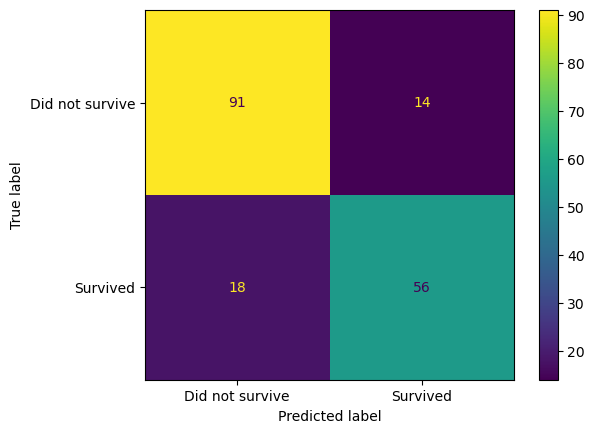

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and predict
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Did not survive', 'Survived']).plot()

# Build a Pipeline

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)
y_pred_pipe = pipeline.predict(X_test)

print("Pipeline Accuracy:", accuracy_score(y_test, y_pred_pipe))

Pipeline Accuracy: 0.8212290502793296


# Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, X, y, cv=5)
print("Cross-Validation Scores:", scores)
print("Average CV Accuracy:", scores.mean())

Cross-Validation Scores: [0.79329609 0.81460674 0.85393258 0.7752809  0.82022472]
Average CV Accuracy: 0.8114682066411399


# Feature Importance

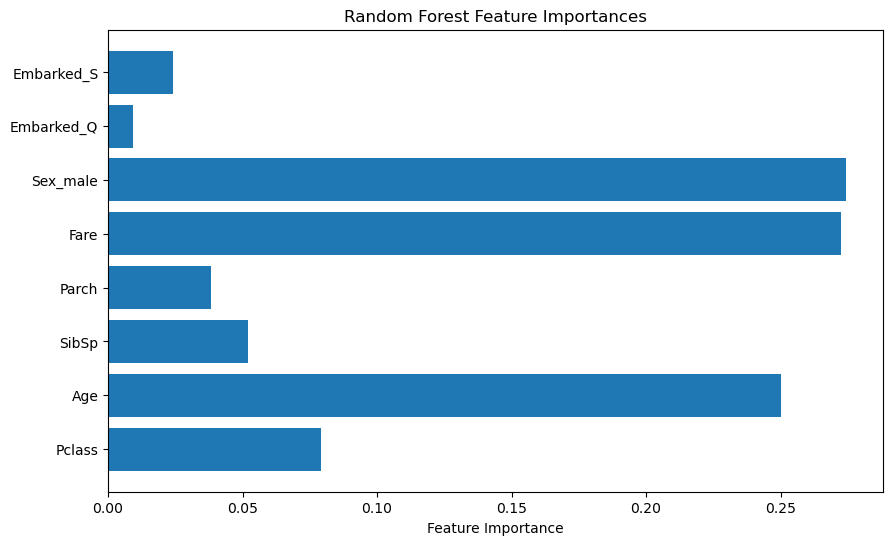

In [7]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()

# Model Comparision

In [9]:
results = {
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [0.81, 0.78, accuracy_score(y_test, y_pred_rf)],
    "Precision": [0.78, 0.72, precision_score(y_test, y_pred_rf)],
    "Recall": [0.74, 0.75, recall_score(y_test, y_pred_rf)],
    "F1 Score": [0.76, 0.74, f1_score(y_test, y_pred_rf)],
}

df_results = pd.DataFrame(results)
df_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.810000,0.78,0.740000,0.760000
1,Decision Tree,0.780000,0.72,0.750000,0.740000
2,Random Forest,0.821229,0.80,0.756757,0.777778
